In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sales_data_with_discounts.csv")

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
df.BU.unique()

array(['Mobiles', 'FMCG', 'Lifestyle'], dtype=object)

In [5]:
df.Brand.unique()

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [6]:
df.City.unique()

array(['C'], dtype=object)

In [7]:
df.Day.unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


## Descriptive Analytics for Numerical Columns

In [9]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


## Volume (Number of Units Sold)

Mean: The average number of units sold per product is 5.07

Median: Half of the products sold 4 units or fewer.

Standard Deviation: The sales volume varies by approximately 4.23 units around the mean, indicating moderate variability.

Min & Max: The smallest volume sold is 1 unit, while the largest is 31 units. This range indicates a few products have significantly higher sales than the majority.


## Avg Price

Mean: The average price of the product is 10453.43

Median: Half of the products are priced at 1450 or less, which shows the data is positively skewed.

Standard Deviation: Prices vary widely by 18079.90, reflecting significant price diversity.

Min & Max: The cheapest product costs 290, while the most expensive is 60100, showing a vast price range.


## Total Sales Value

Mean: The average total sales value per product is 33812.83

Median: Half of the products generate 5700 or less in total sales. Few high-revenue products increased the average.

Standard Deviation: Revenue varies by 50535.07, indicating high variability in product sales performance.

Min & Max: The lowest revenue is 400, while the highest is 196400, suggesting a few products dominate sales.


## Discount Rate (%)

Mean: The average discount rate is 15.15%

Median: Half of the products have a discount rate of 16.58% or lower, with the distribution slightly skewed toward lower discounts.

Standard Deviation: The discount rate varies by 4.22%, indicating moderate consistency across products.

Min & Max: Discounts range from 5.01% to 19.99%, showing that most products are discounted within a fairly narrow range.


## Discount Amount

Mean: The average discount amount per product is 3346.5

Median: Half of the discounts are 988.93 or less, suggesting many products have low discounts, but a few high discounts pull up the average.

Standard Deviation: Discounts vary by 4509.90, indicating a wide range in discount amounts.

Min & Max: Discounts range from 69.18 to 25738.02, reflecting significant variability.


## Net Sales Value

Mean: The average net sales value per product is 30466.34

Median: Half of the products have a net sales value of 4677.79 or less, suggesting the data is positively skewed due to a few high-value products.

Standard Deviation: Net sales value varies by 46358.66, showing considerable diversity in revenue after discounts.

Min & Max: The lowest net sales value is 326.97, and the highest is 179507.48, indicating a few products contribute significantly to overall sales.

In [10]:
df.isna().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [11]:
df.select_dtypes(include=['int64', 'float64']).head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [12]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

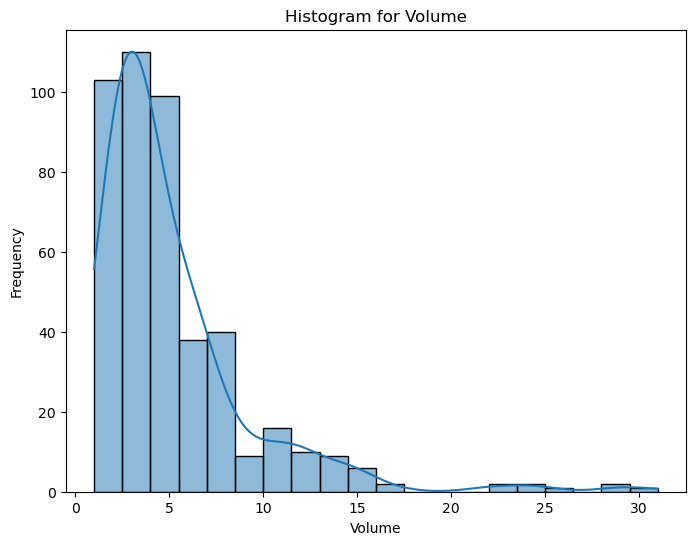

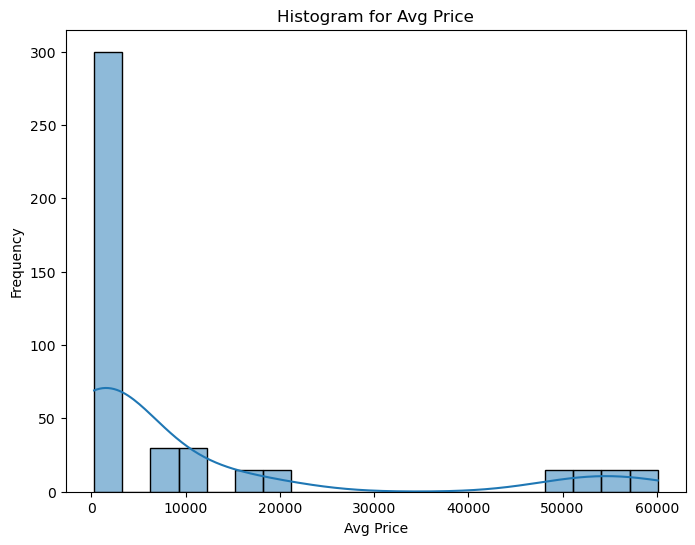

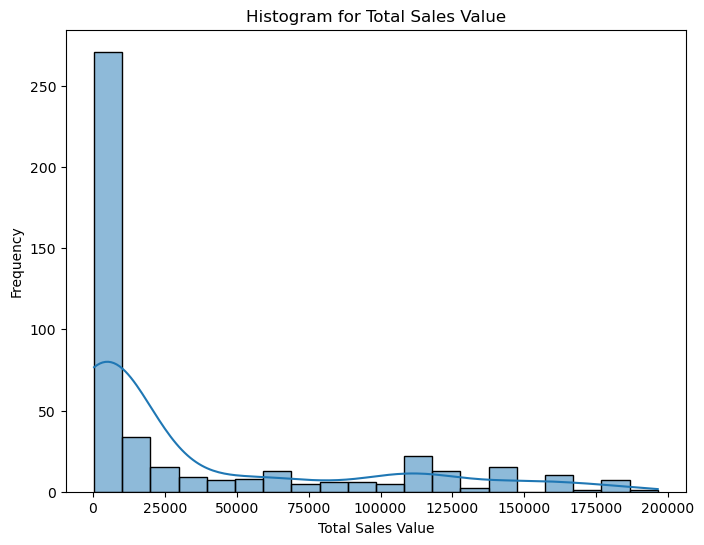

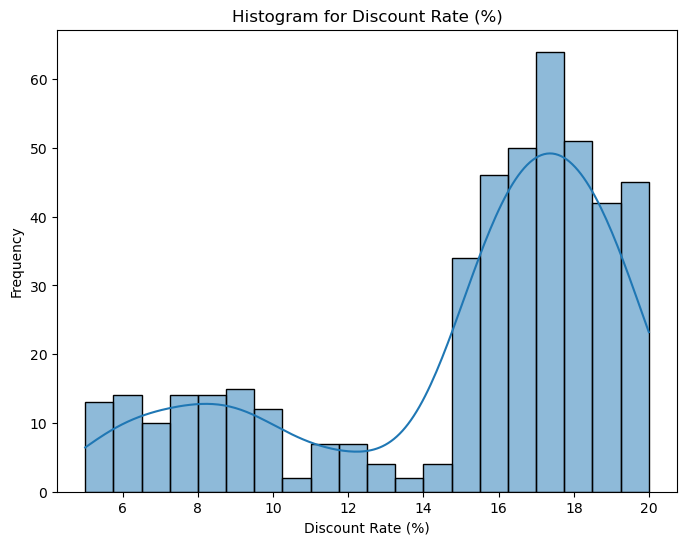

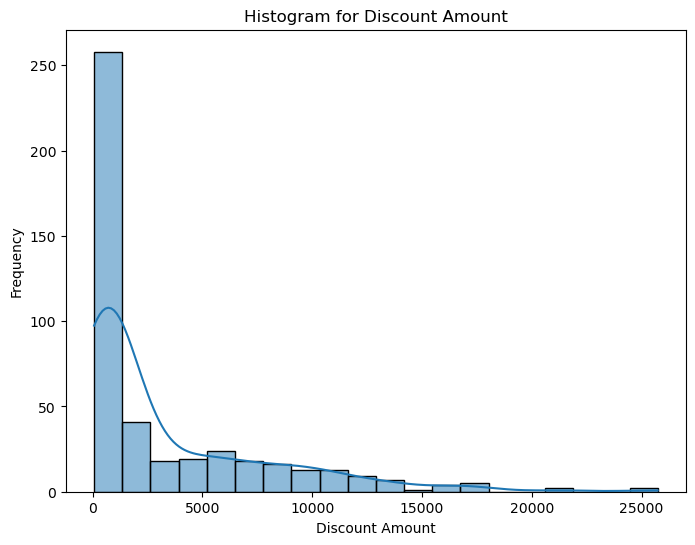

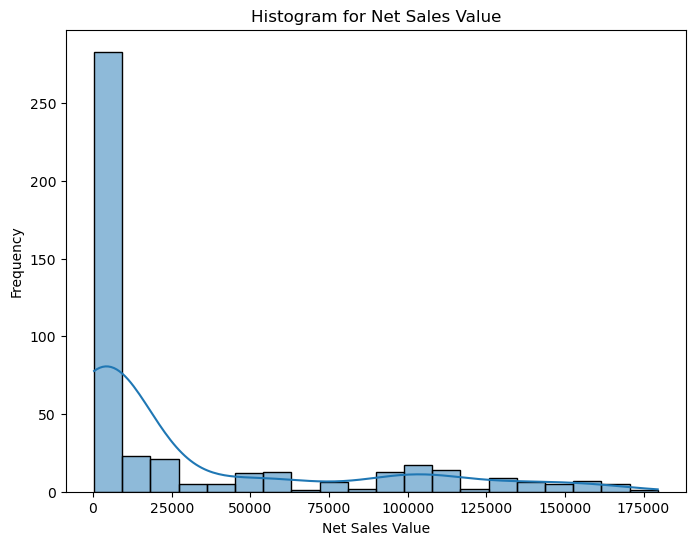

In [13]:
import warnings
warnings.filterwarnings('ignore')
for column in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Histogram for {column}")
    plt.show()

# Except Discount Rate (%), everything else is right skewed

# Detecting Outliers using Boxplot

In [14]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


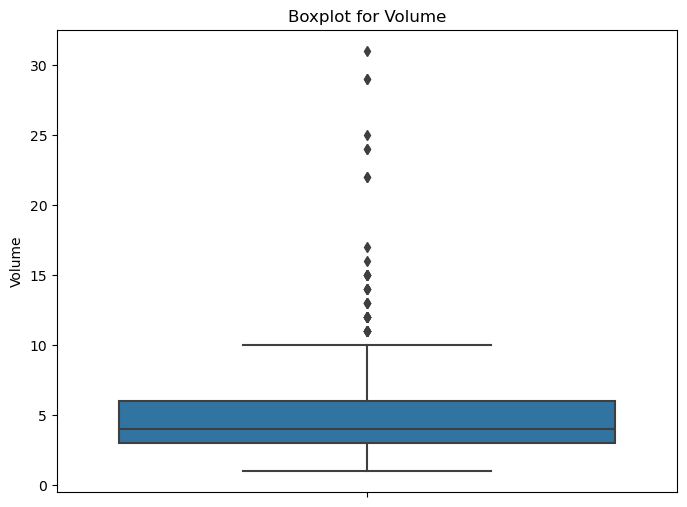

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(y = df['Volume'])
plt.title("Boxplot for Volume")
plt.show()

Q1 = 3, Q3 = 6, IQR = Q3 - Q1 = 3

Upper Outlier = Q3 + 1.5 * IQR

            = 6 + 1.5 * (3)
            
            = 10.5
            
Lower Outlier = Q1 - 1.5 * IQR

               = 3 - 1.5 * 3
               
               = -1.5

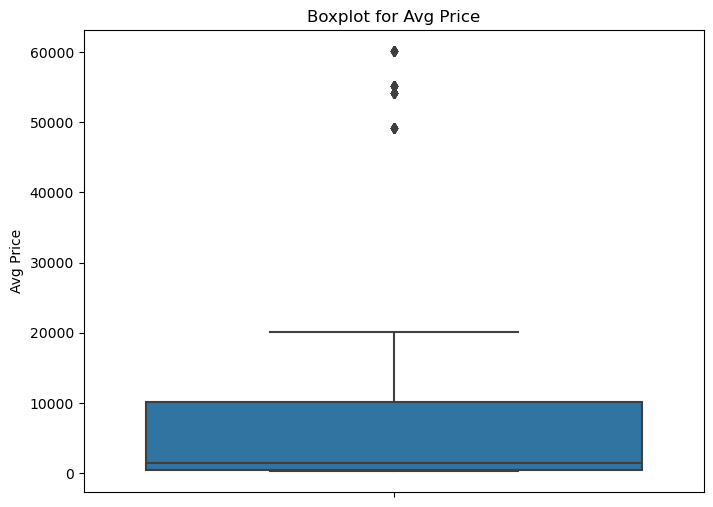

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(y = df['Avg Price'])
plt.title("Boxplot for Avg Price")
plt.show()

Q1 = 465, Q3 = 10100, IQR = 9635

Upper Outlier = Q3 + 1.5 * IQR

        = 10100 + 1.5 * (9635)
        
        = 24552.5
        
Lower Outlier = Q1 - 1.5 * IQR

        = 465 - 1.5 * 9635
           
        = -13987.5

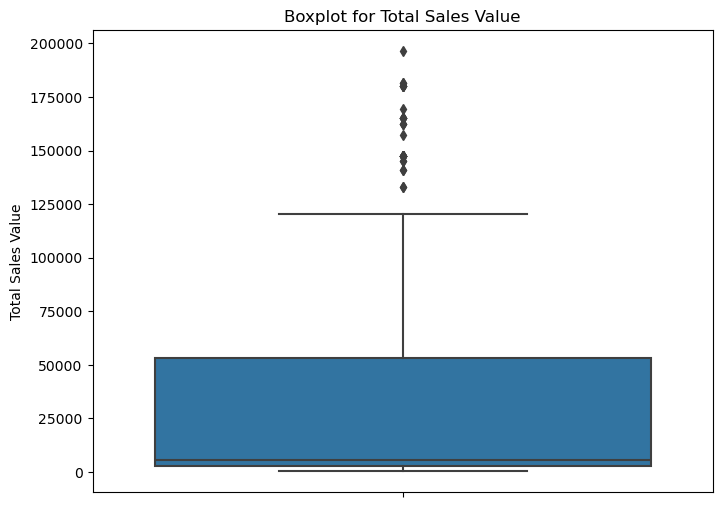

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(y = df['Total Sales Value'])
plt.title("Boxplot for Total Sales Value")
plt.show()

Q1 = 2700, Q3 = 53200, IQR = 50500

Upper Outlier = Q3 + 1.5*(IQR)

              = 53000 + 1.5*(50500)
              
              = 128950
              
Lower Outlier = Q1 - 1.5 * IQR

              = 2700 - 1.5 * 50500
       
              = -73,050              

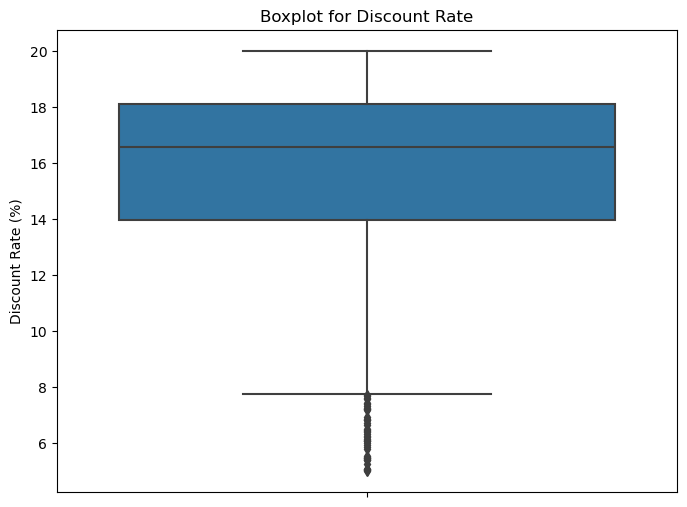

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(y = df['Discount Rate (%)'])
plt.title("Boxplot for Discount Rate")
plt.show()

Q1 = 13.97, Q3 = 18.11, IQR = 4.15

Upper Outlier = Q3 + 1.5*(IQR)

              = 18.11 + 1.5*(4.15)
              
              = 24.34
              
Lower Outlier = Q1 - 1.5 * IQR

              = 13.97 - 1.5 * 4.15
       
              = 7.74       

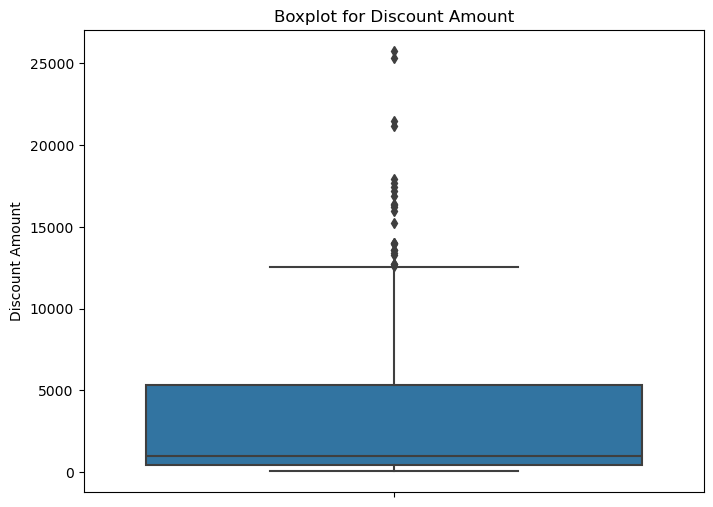

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(y = df['Discount Amount'])
plt.title("Boxplot for Discount Amount")
plt.show()

Q1 = 460.46, Q3 = 5316.50, IQR = 4856.04

Upper Outlier = Q3 + 1.5*(IQR)

              = 5316.50 + 1.5*(4856.04)
              
              = 12600.55
              
Lower Outlier = Q1 - 1.5 * IQR

              = 460.46 - 1.5 * 4856.04
       
              = -6823.59  

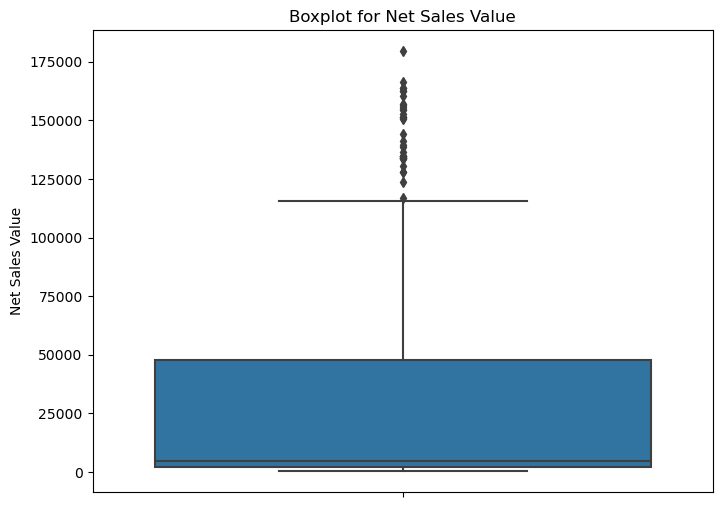

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(y = df['Net Sales Value'])
plt.title("Boxplot for Net Sales Value")
plt.show()

Q1 = 2202.21, Q3 = 47847.91, IQR = 45645.70

Upper Outlier = Q3 + 1.5*(IQR)

          = 47847.91 + 1.5*(45645.70)
          
          = 116316.47
          
Lower Outlier = Q1 - 1.5 * IQR

          = 2202.21 - 1.5 * 45645.70
   
          = -66266.35  

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [22]:
df.select_dtypes(include='object')

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


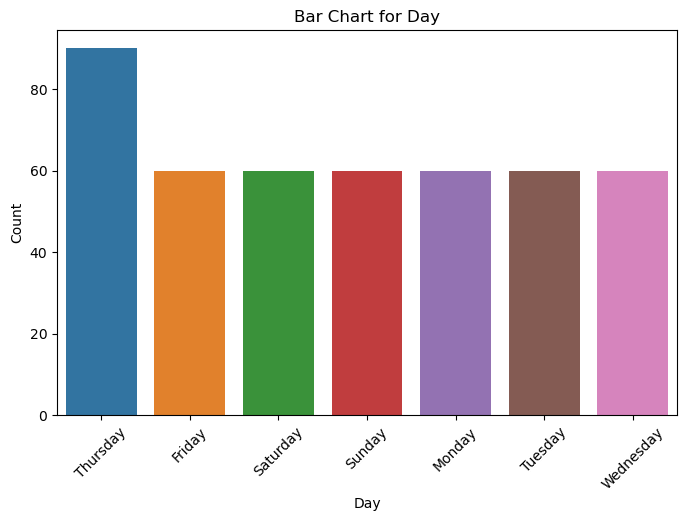

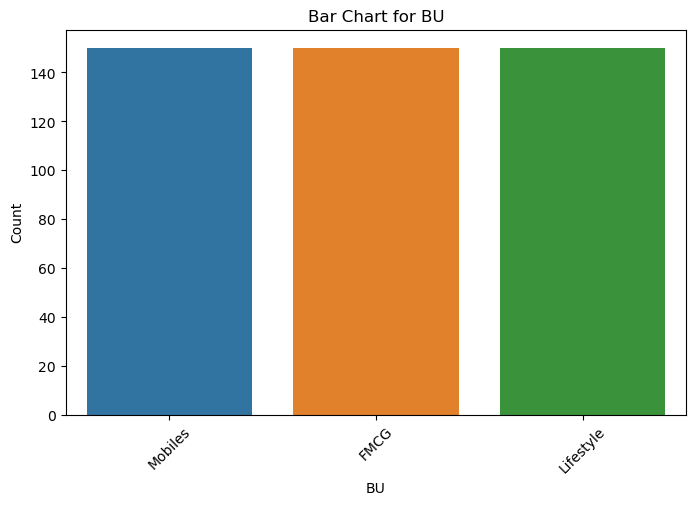

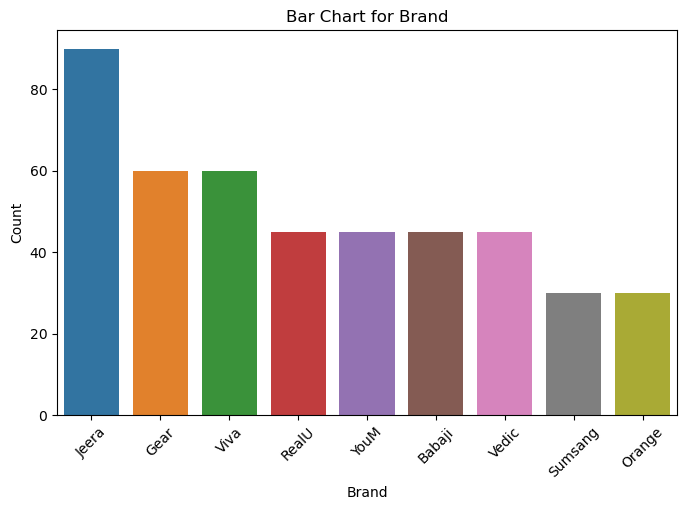

In [23]:
categorical_columns = ['Day', 'BU', 'Brand']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Bar Chart for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

### Bar Chart for Day
##### There were more sales on Thursday than any other day.

### Bar Chart for Business Unit (BU)
##### Mobiles: 150 Entries, FMCG (Fast-Moving Consumer Goods): 150 Entries, Lifestyles: 150 Entries.
##### The distribution across BU categories is perfectly balanced, with each category contributing equally to the dataset.

### Bar Chart for Brand
##### Jeera is the most frequent brand, contributing 90 entries.
##### Brands like Sumsang and Orange have the lowest representation with only 30 entries each.
##### Gear and Viva are the second most frequent brand, contributing to 60 entries.
##### RealU, YouM, Babaji, Vedic are contributing to 45 entries.

# Standardization of Numerical Variables

In [24]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [25]:
df = df.drop(columns=['SKU', 'Model'])

In [26]:
df = df[['City', 'BU', 'Brand', 'Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]

In [27]:
df

,City,BU,Brand,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,C,Mobiles,RealU,15,12100,181500,11.654820,21153.498820,160346.501180
1,C,Mobiles,RealU,10,10100,101000,11.560498,11676.102961,89323.897039
2,C,Mobiles,YouM,7,16100,112700,9.456886,10657.910157,102042.089843
3,C,Mobiles,YouM,6,20100,120600,6.935385,8364.074702,112235.925298
4,C,Mobiles,YouM,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...
445,C,Lifestyle,Jeera,2,1300,2600,15.475687,402.367873,2197.632127
446,C,Lifestyle,Viva,6,2600,15600,17.057027,2660.896242,12939.103758
447,C,Lifestyle,Viva,2,1600,3200,18.965550,606.897606,2593.102394
448,C,Lifestyle,Jeera,3,1900,5700,16.793014,957.201826,4742.798174


In [28]:
def z_score_norm(i):
    x = (i - i.mean()) / i.std()
    return x

In [29]:
df_before_standardized = df[numerical_columns]

In [30]:
df_standardized = z_score_norm(df.iloc[:, 4:])

## Before Standardization

In [31]:
df_before_standardized

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


## After Standardization

In [32]:
df_standardized

,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,0.091072,2.922469,-0.829365,3.948422,2.801638
1,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...
445,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


### Why converting categorical data?

Machine Learning models cannot directly handle categorical variable. One-hot encoding converts these categorical values into binary columns.

In [33]:
df_category = df[['BU', 'Brand']]

In [34]:
df_category = pd.get_dummies(df_category, drop_first=True).astype(int)

In [35]:
df_category

,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
445,1,0,0,1,0,0,0,0,0,0
446,1,0,0,0,0,0,0,0,1,0
447,1,0,0,0,0,0,0,0,1,0
448,1,0,0,1,0,0,0,0,0,0


In [36]:
New_Df_encoded = pd.concat([df_category, df_standardized], axis=1)

In [37]:
New_Df_encoded

,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,0,1,0,0,0,1,0,0,0,0,0.091072,2.922469,-0.829365,3.948422,2.801638
1,0,1,0,0,0,1,0,0,0,0,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0,1,0,0,0,0,0,0,0,1,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0,1,0,0,0,0,0,0,0,1,0.533552,1.717365,-1.947555,1.112568,1.763847
4,0,1,0,0,0,0,0,0,0,1,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,0,0,1,0,0,0,0,0,0,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,1,0,0,0,0,0,0,0,1,0,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,1,0,0,0,0,0,0,0,1,0,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,1,0,0,1,0,0,0,0,0,0,-0.473091,-0.556303,0.388042,-0.529789,-0.554881
